In [4]:
#notebooks/eda.ipynb

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Set style
sns.set(style = "whitegrid")

In [10]:
#Load cleaned and transformed dataset
df = pd.read_csv("../data/processed/clean_consumer_complaints.csv", low_memory = False)
print(df.shape)
df.head()

(66806, 11)


,product,sub_product,issue,company,state,timely_response,text_cleaned,consumer_disputed_binary,timely_response_binary,company_response_encoded,text_length
0,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,"Diversified Consultants, Inc.",NY,Yes,xxxx has claimed i owe them for xxxx years des...,0,1,1,52
1,Consumer Loan,Vehicle loan,Managing the loan or lease,M&T Bank Corporation,VA,Yes,due to inconsistencies in the amount owed that...,0,1,1,238
2,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",Wells Fargo & Company,CA,Yes,in xxxxxxxx my wages that i earned at my job d...,1,1,1,655
3,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",JPMorgan Chase & Co.,CA,Yes,i have an open and current mortgage with chase...,1,1,1,74
4,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,Rushmore Loan Management Services LLC,CA,Yes,xxxx was submitted xxxxxxxx at the time i subm...,1,1,1,259


## Basic Feature Distributions

### Complaint Length

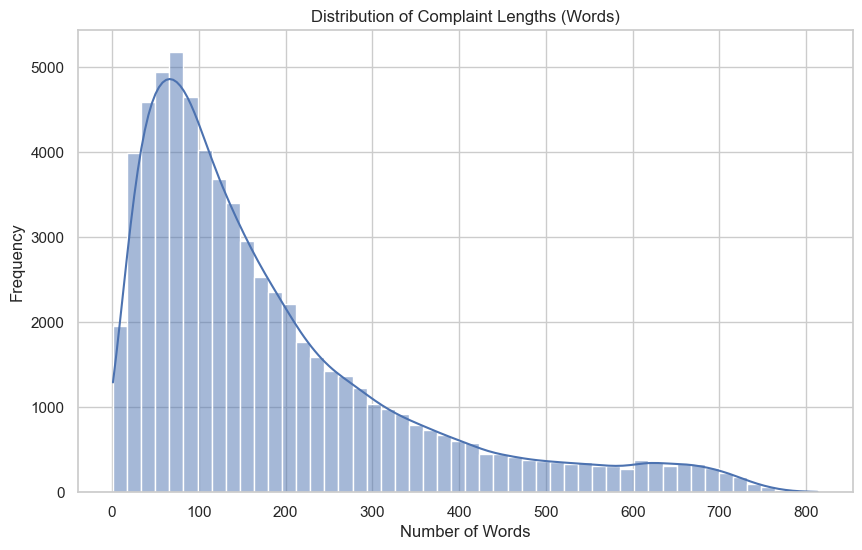

In [13]:
plt.figure(figsize = (10,6))
sns.histplot(df["text_length"], bins=50, kde = True)
plt.title("Distribution of Complaint Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### Dispute Distribution

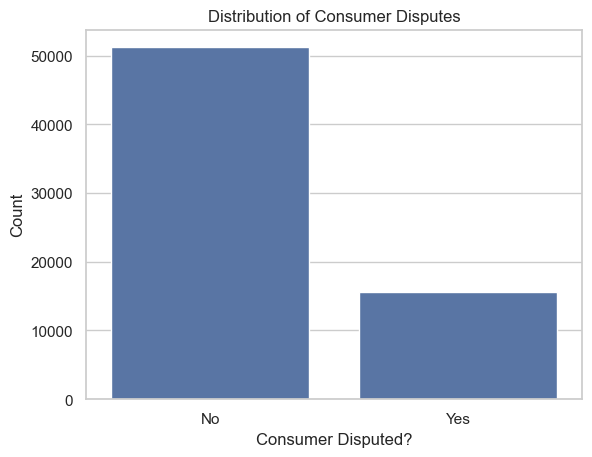

In [17]:
sns.countplot(data = df, x = "consumer_disputed_binary")
plt.title("Distribution of Consumer Disputes")
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel("Consumer Disputed?")
plt.ylabel("Count")
plt.show()

### Timely Response & Company Response Encoding

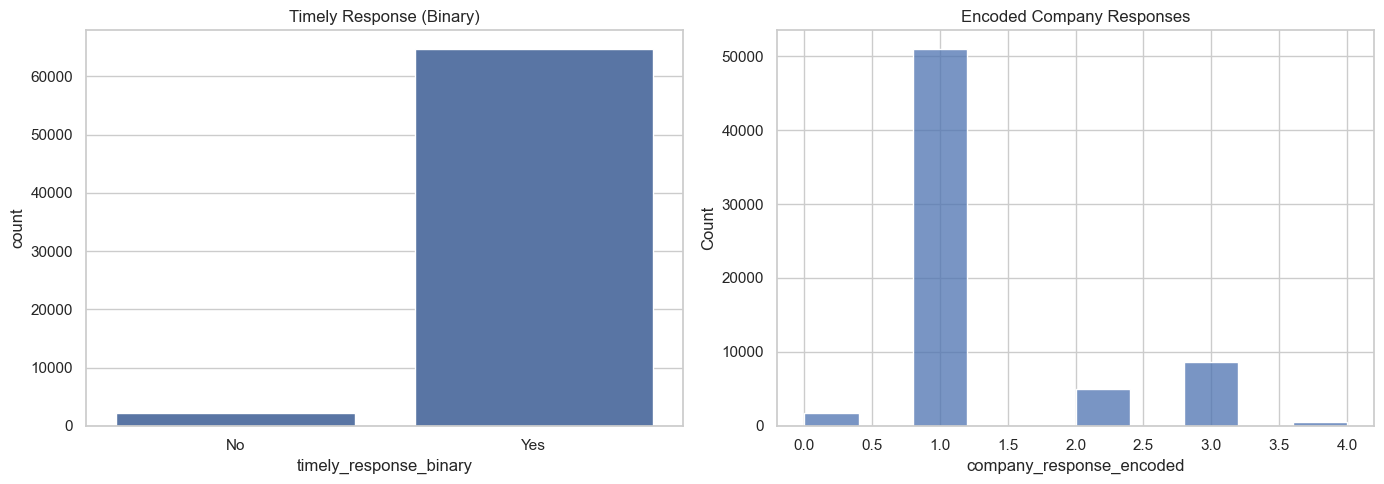

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=df, x="timely_response_binary", ax = ax[0])
sns.histplot(df["company_response_encoded"],bins=10, ax=ax[1], kde=False)

ax[0].set_title("Timely Response (Binary)")
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['No','Yes'])
ax[1].set_title("Encoded Company Responses")
plt.tight_layout()
plt.show()